# 1. Data Preparation:
## 1.1. Loading the Data:
If you have the dataset in a CSV format, you can use Pandas to load it:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Reviews.csv'  # Replace with your file path
df = pd.read_csv(file_path)


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## 1.2. Data Cleaning:
### 1.2.1. Remove Duplicates:
Deduplicate the dataset to ensure you don't have redundant data:

In [ ]:
df.drop_duplicates(inplace=True)


### 1.2.2. Handle Missing Values:
Check for missing values:

In [ ]:
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


If there are missing values in the Text column (which is crucial for sentiment analysis), you might consider dropping those rows:

In [ ]:
df.dropna(subset=['Text'], inplace=True)

## 1.3. Text Pre-processing:
We'll use libraries such as re for regular expressions and nltk for natural language processing.

### 1.3.1. Convert to Lowercase:

In [ ]:
df['Text'] = df['Text'].str.lower()

### 1.3.2. Remove Punctuations, Numbers, and Special Characters:

In [ ]:
import re

def clean_text(text):
    # Remove punctuations, numbers, and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['Text'] = df['Text'].apply(clean_text)

### 1.3.3. Tokenize the Text and Remove Stopwords:
You need to install and import the necessary nltk libraries:

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['Text'] = df['Text'].apply(tokenize_and_remove_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1.3.4. Stemming or Lemmatization:
For simplicity, let's use stemming:

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [ps.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

df['Text'] = df['Text'].apply(stem_text)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arriv label jumbo salt peanutsth peanu...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confect around centuri light pillowi citru gel...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffi great price wide assort yummi taff...


# 2. Exploratory Data Analysis (EDA):
## 2.1. Understand the Distribution of Scores:
It's crucial to know the distribution of ratings as it gives an overview of the sentiments of the reviews.

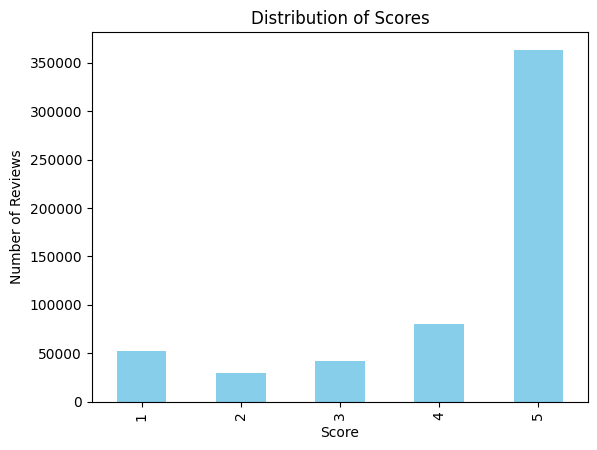

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of scores
df['Score'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.show()


## 2.2. Visualize Number of Reviews Over Time:
This will help you understand any trends or patterns over the years.

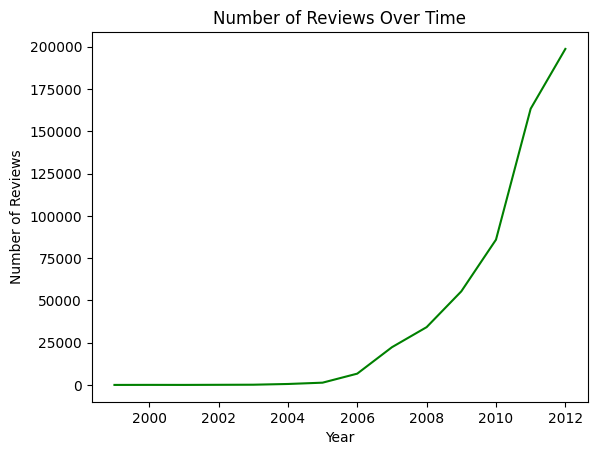

In [ ]:
# Convert 'Time' column to datetime format
df['DateTime'] = pd.to_datetime(df['Time'], unit='s')
df.groupby(df['DateTime'].dt.year)['Text'].count().plot(kind='line', color='green')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()


## 2.3. Word Clouds for Positive and Negative Reviews:
Word clouds visually represent the frequency of words. They can give you insights into which words are most common in positive and negative reviews.

First, you need to install the wordcloud library:

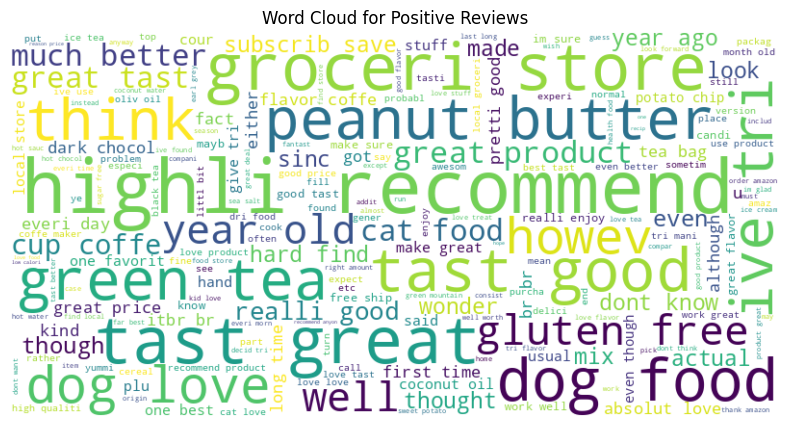

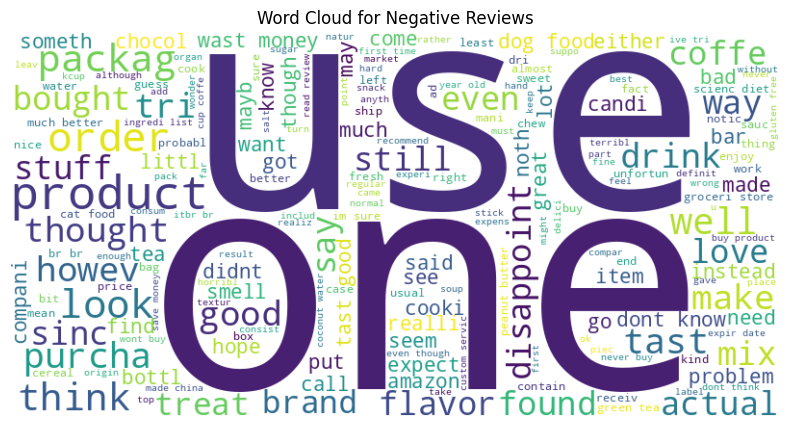

In [ ]:
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = ' '.join(df[df['Score'] > 3]['Text'])
negative_reviews = ' '.join(df[df['Score'] < 3]['Text'])

# Generate word cloud for positive reviews
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Generate word cloud for negative reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


# 3. Labeling:
To determine the sentiment of a review, we'll use the 'Score' attribute:

Positive sentiment: Score 4-5
Neutral sentiment: Score 3
Negative sentiment: Score 1-2
## 3.1. Defining the Labels:

In [ ]:
def label_sentiment(row):
    if row['Score'] > 3:
        return 'Positive'
    elif row['Score'] < 3:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df.apply(label_sentiment, axis=1)


## 3.2. Visualize the Distribution of Sentiments:
Now that you've labeled each review, it can be useful to visualize the distribution of sentiments in the dataset.

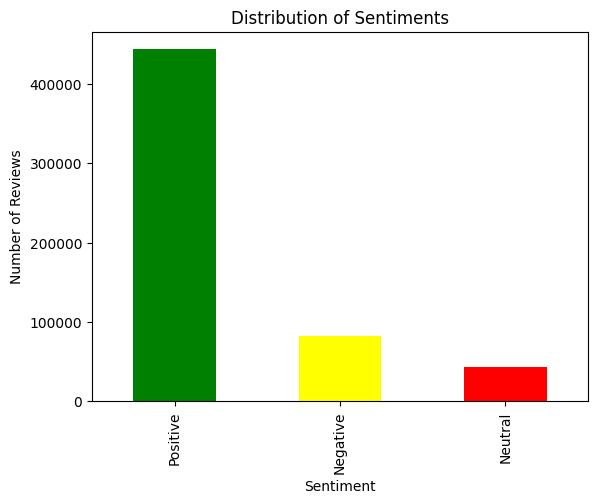

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of sentiments
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


## 3.3. Analyzing Sentiment Over Time:
Understanding how sentiment has changed over time can be insightful. For example, you may wish to see if there's a general trend of increasing or decreasing positive sentiments.

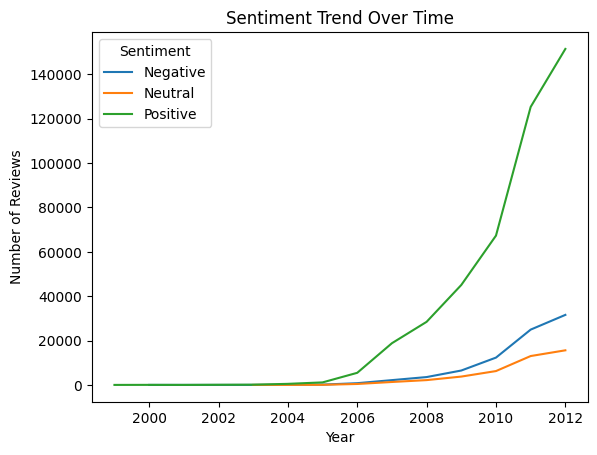

In [ ]:
# Group by year and sentiment and then unstack to pivot the data for plotting
df.groupby([df['DateTime'].dt.year, 'Sentiment']).size().unstack().plot(kind='line')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()


## 3.4. Investigating Neutral Sentiments:
Sometimes, neutral reviews can be tricky. They might not provide clear feedback (neither praise nor criticism). It can be useful to understand the common words or phrases in neutral reviews.

In [ ]:
from collections import Counter
import nltk

# Tokenizing neutral reviews
neutral_reviews = df[df['Sentiment'] == 'Neutral']['Text']
neutral_tokens = nltk.word_tokenize(' '.join(neutral_reviews))

# Finding the most common words in neutral reviews
neutral_word_freq = Counter(neutral_tokens)
print(neutral_word_freq.most_common(10))


[('like', 29819), ('br', 29417), ('tast', 27282), ('flavor', 22789), ('good', 18550), ('coffe', 18519), ('product', 16480), ('one', 15923), ('would', 15465), ('use', 14537)]


This code will give you the 10 most common words in neutral reviews. You can further extend this to analyze patterns or create word clouds similar to what we did in Step 2.



# 4. Feature Extraction & Splitting the Dataset:
## 4.1. Text Vectorization:
For text data, we typically convert the text into vectors of numbers. The most common methods are:

Bag of Words
TF-IDF (Term Frequency-Inverse Document Frequency)
We'll use TF-IDF here as it gives weight to the importance of a term in the document and the entire corpus.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the 'Text' column
X = vectorizer.fit_transform(df['Text'])


## 4.2. Encoding the Sentiment Labels:
We'll convert the sentiment labels into numerical format:

Positive: 2
Neutral: 1
Negative: 0

In [ ]:
def encode_sentiment(label):
    if label == 'Positive':
        return 2
    elif label == 'Neutral':
        return 1
    else:
        return 0

y = df['Sentiment'].apply(encode_sentiment)


## 4.3. Splitting the Dataset:
Now, split the dataset into training and test sets. This will allow us to train models on one set and evaluate their performance on another, unseen set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4.4. Feature Scaling (Optional):
For some algorithms, it's beneficial to have features on the same scale. TF-IDF generally produces scaled values, but if you decide to incorporate other features in the future, you might want to consider scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # with_mean=False is required for sparse matrix
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5. Model Selection & Training:
## 5.1. Choosing the Models:
For sentiment analysis, algorithms that work well include:

Logistic Regression: A good baseline model.
Multinomial Naive Bayes: Often used for text classification problems.
Support Vector Machines (SVM): Known to work well for text classification.
Decision Trees or Random Forest: Can handle both linear and non-linear data.
Gradient Boosting Machines (like XGBoost): Often delivers superior results.
## 5.2. Training and Evaluating:
### 5.2.1. Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predict and evaluate
lr_predictions = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))



Logistic Regression Accuracy: 0.8626804232525002
              precision    recall  f1-score   support

           0       0.73      0.65      0.69     16181
           1       0.51      0.16      0.25      8485
           2       0.89      0.97      0.93     89025

    accuracy                           0.86    113691
   macro avg       0.71      0.59      0.62    113691
weighted avg       0.84      0.86      0.84    113691



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
svm_model = LinearSVC(random_state=50)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
print("SVM Model Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))


SVM Model Accuracy: 0.8615369730233704
              precision    recall  f1-score   support

           0       0.72      0.65      0.68     16181
           1       0.58      0.09      0.16      8485
           2       0.89      0.97      0.93     89025

    accuracy                           0.86    113691
   macro avg       0.73      0.57      0.59    113691
weighted avg       0.84      0.86      0.84    113691



## 5.3. Cross-Validation:
To avoid overfitting and get a more generalized performance metric, you can employ cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score

# Using Logistic Regression as an example
scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Average cross-validation score: {:.2f}".format(scores.mean()))


In [ ]:
import pickle

# Save the model
with open('/content/drive/MyDrive/Books/logistic_regression_model.pickle', 'wb') as file:
    pickle.dump(lr, file)

with open('/content/drive/MyDrive/Books/svm_model.pickle', 'wb') as file:
    pickle.dump(svm_model, file)

# If you also want to save the vectorizer for future use:
with open('/content/drive/MyDrive/Books/tfidf_vectorizer.pickle', 'wb') as file:
    pickle.dump(vectorizer, file)

